## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

# 1.Descriptive Analytics for Numerical Columns

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Loading the dataset
data = pd.read_csv('sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [11]:
#all the columns names present in out dataset
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [24]:
#Identify numerical columns
numerical_columns = sales_data.select_dtypes(include=np.number).columns
numerical_columns


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [54]:
#Calculating mean, median, mode, and standard deviation
mean_values = sales_data[numerical_columns].mean()
median_values = sales_data[numerical_columns].median()
mode_values = sales_data[numerical_columns].mode().iloc[0] 
std_dev_values = sales_data[numerical_columns].std()

In [37]:
#mean
print(mean_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [38]:
#median
print(median_values)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [39]:
#Mode
print(mode_values)

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


In [ ]:
#standard deviation 
print(std_dev_values)

In [47]:
# Using describe() to understand the statistics of a specific columns
statistics = sales_data.describe()
statistics



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [50]:
# Extracting mean, median (50%), and standard deviation from .describe()
mean_median_std = statistics.loc[['mean', '50%', 'std']]
mean_median_std

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


In [55]:
std_dev_values #Mode values


Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

# 2.Data Visualization

## Histograms

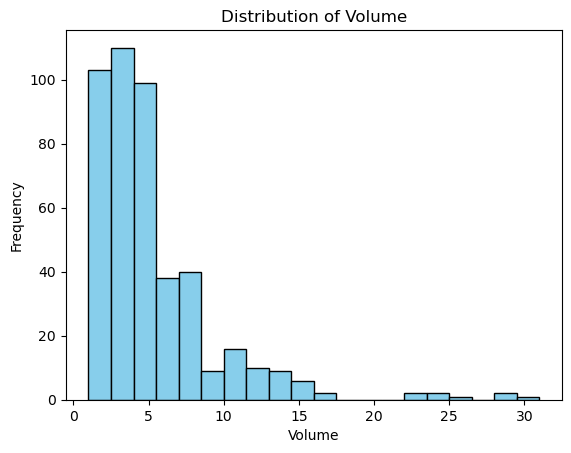

In [57]:
plt.hist(sales_data['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


Analysis:
The histogram of Volume shows that the majority of transactions involve a small number of units sold, 
with a right-skewed distribution. There are a few transactions with a significantly higher volume compared to the rest, 
indicating the presence of outliers.



#### Avg Price

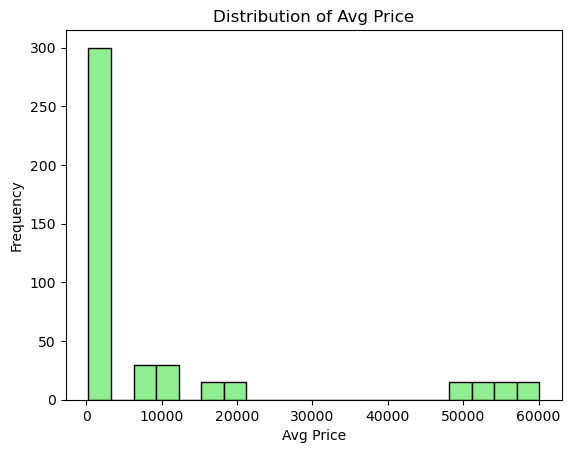

In [59]:
plt.hist(sales_data['Avg Price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Avg Price')
plt.xlabel('Avg Price')
plt.ylabel('Frequency')
plt.show()


Analysis:
The histogram of Avg Price indicates that most products are sold at lower prices, with a right-skewed distribution.
There are also some products sold at higher prices, contributing to the tail of the distribution.


#### Total Sales Value

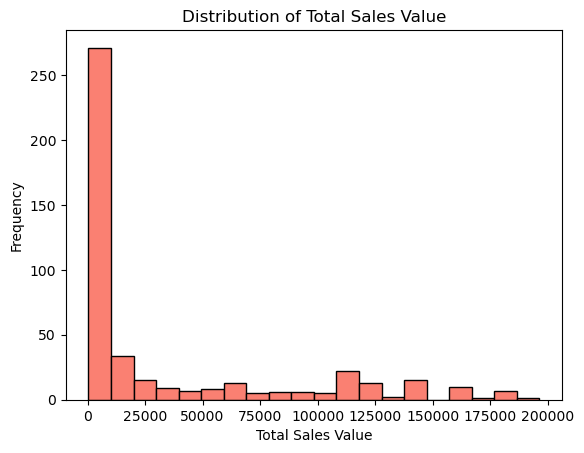

In [61]:
plt.hist(sales_data['Total Sales Value'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')
plt.show()



Analysis:
The histogram of Total Sales Value shows a wide range of sales values, with a right-skewed distribution.
Most transactions have lower sales values, while there are a few transactions with significantly higher sales values.


## Boxplots

#### Volume

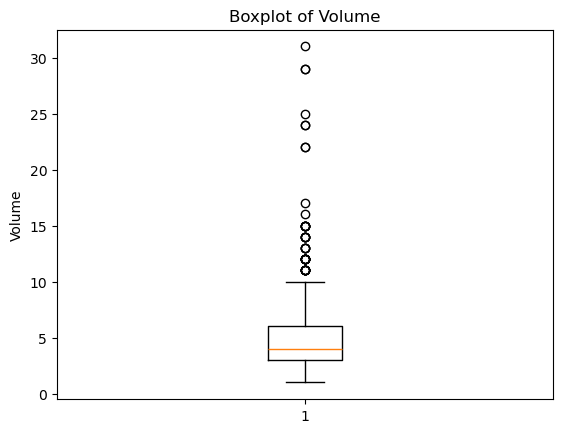

In [63]:
plt.boxplot(sales_data['Volume'])
plt.title('Boxplot of Volume')
plt.ylabel('Volume')
plt.show()



Analysis:
The boxplot of Volume reveals the presence of outliers,
with the majority of transactions having a smaller volume of units sold.
The median volume is lower, indicating that half of the transactions involve selling fewer units.


#### Avg Price

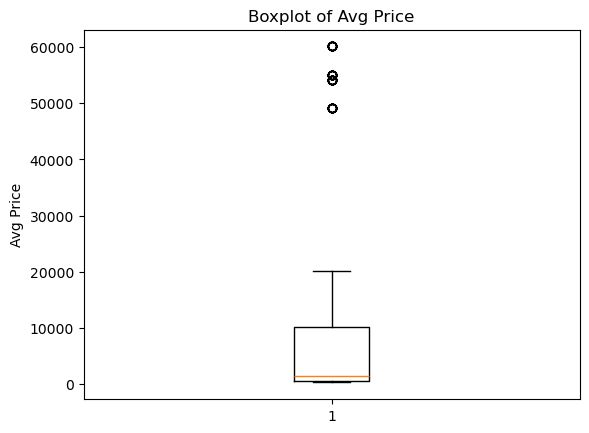

In [65]:
plt.boxplot(sales_data['Avg Price'])
plt.title('Boxplot of Avg Price')
plt.ylabel('Avg Price')
plt.show()



Analysis:
The boxplot of Avg Price shows the distribution of product prices, with a few outliers on the higher end. 
Most products are sold at lower prices, with the median price falling in the lower range.


#### Total Sales Value

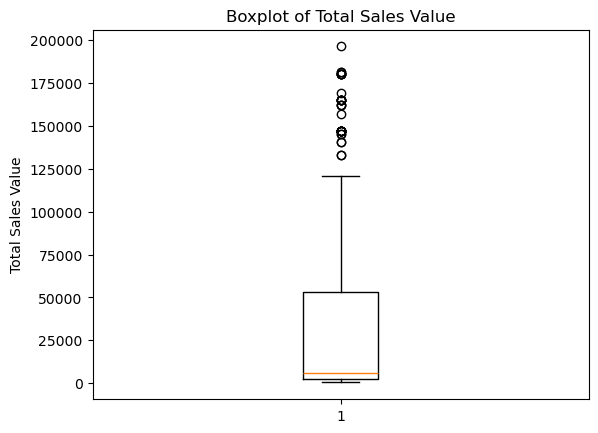

In [67]:
plt.boxplot(sales_data['Total Sales Value'])
plt.title('Boxplot of Total Sales Value')
plt.ylabel('Total Sales Value')
plt.show()



Analysis:
The boxplot of Total Sales Value illustrates the spread of sales values, 
with some transactions having significantly higher values compared to others.
There are a few outliers representing high sales values.


## Bar Chart Analysis for Categorical Column

#### City

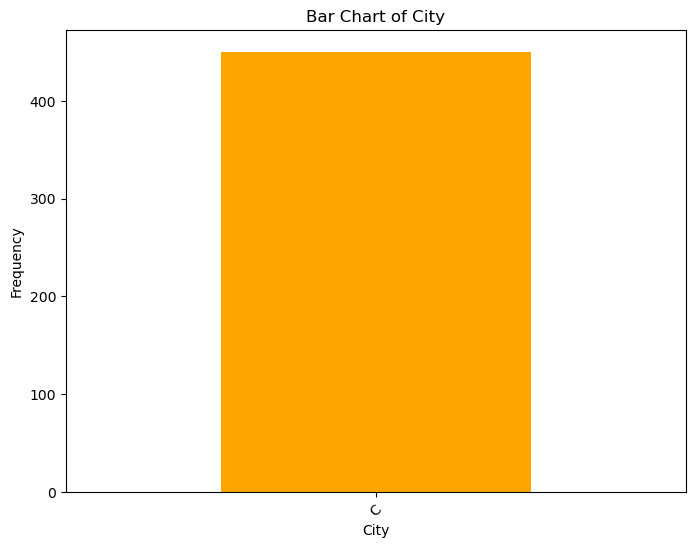

In [69]:
plt.figure(figsize=(8, 6))
sales_data['City'].value_counts().plot(kind='bar', color='orange')
plt.title('Bar Chart of City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Analysis for City

The bar chart of City displays the frequency of transactions in each city. 
It indicates that most transactions occur in City C, followed by other cities.
This insight can be useful for understanding the distribution of sales across different locations.
                          

#### Brand

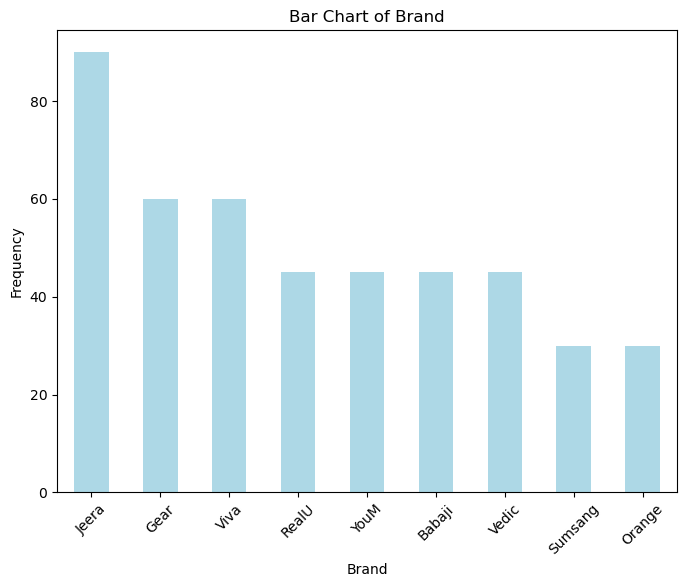

In [71]:
plt.figure(figsize=(8, 6))
sales_data['Brand'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Bar Chart of Brand')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Analysis for Brand

The bar chart of Brand shows the frequency of transactions for each brand. 
It reveals that RealU is the most popular brand, followed by other brands.
This information can be valuable for analyzing the market share of different brands.


# 3.Standardization of Numerical Variables


### Explanation of Standardization (Z-score Normalization)

Standardization, also known as Z-score normalization, is a technique used to transform numerical variables to have a mean of 0 and a standard deviation of 1. This process involves subtracting the mean (mu) from each value and then dividing by the standard deviation (sigma). 
This standardizes the distribution of the data, making it easier to compare variables with different scales and improving the performance of analytical models.


#### Before Standardization

In [74]:
# Displaying summary statistics before standardization
print("Summary Statistics Before Standardization:")
print(sales_data.describe())

Summary Statistics Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%  

## Standardization

In [80]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for standardization
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
numerical_columns

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [81]:
# Standardizing numerical columns
scaler = StandardScaler()
scaler


StandardScaler()

In [83]:
sales_data_standardized = sales_data.copy()  # Creating a copy of the original dataset
sales_data_standardized[numerical_columns] = scaler.fit_transform(sales_data[numerical_columns])
sales_data_standardized[numerical_columns] 

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


## After Standardization

In [85]:
# Displaying summary statistics after standardization
print("\nSummary Statistics After Standardization:")
print(sales_data_standardized.describe())



Summary Statistics After Standardization:
             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   6.118562e-17  3.157968e-17       1.578984e-17      -3.552714e-17   
std    1.001113e+00  1.001113e+00       1.001113e+00       1.001113e+00   
min   -9.620925e-01 -5.627654e-01      -6.619170e-01      -2.406935e+00   
25%   -4.889322e-01 -5.530754e-01      -6.163534e-01      -2.823066e-01   
50%   -2.523521e-01 -4.985344e-01      -5.569226e-01       3.374180e-01   
75%    2.208081e-01 -1.957016e-02       3.840648e-01       7.019781e-01   
max    6.135311e+00  2.749009e+00       3.220894e+00       1.147360e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.526444e-17     1.973730e-17  
std       1.001113e+00     1.001113e+00  
min      -7.275032e-01    -6.508581e-01  
25%      -6.406462e-01    -6.103625e-01  
50%      -5.233349e-01    -5.

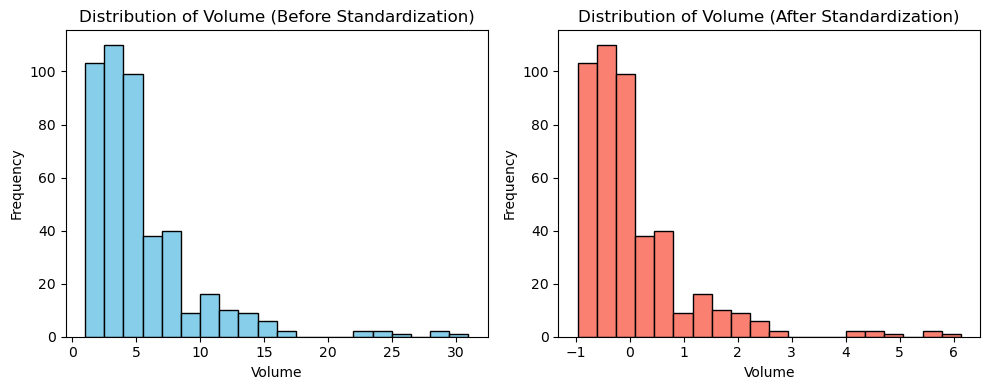

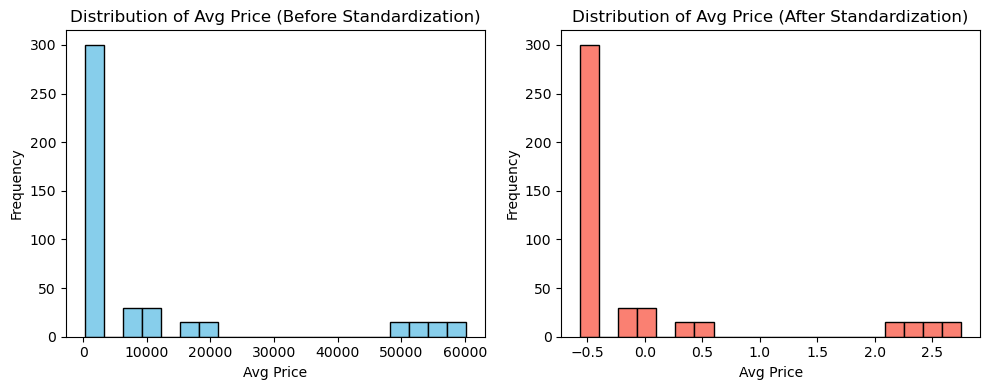

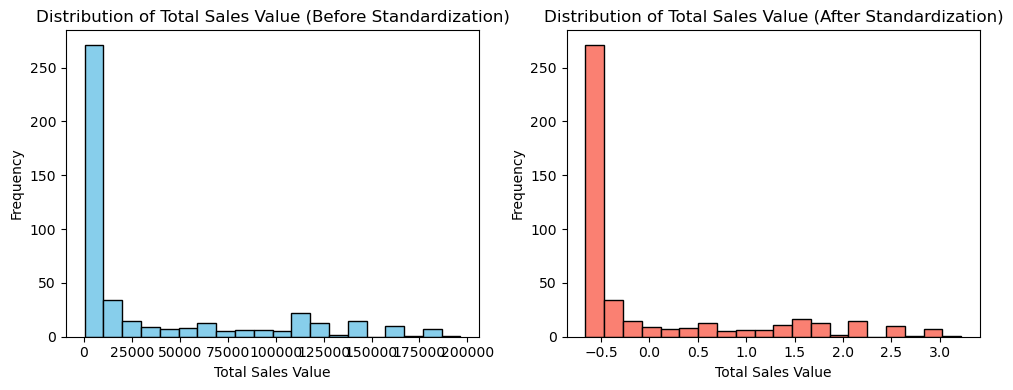

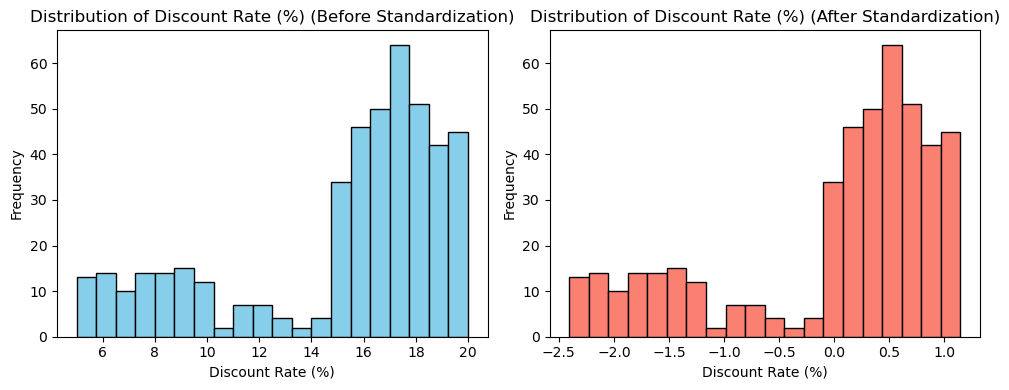

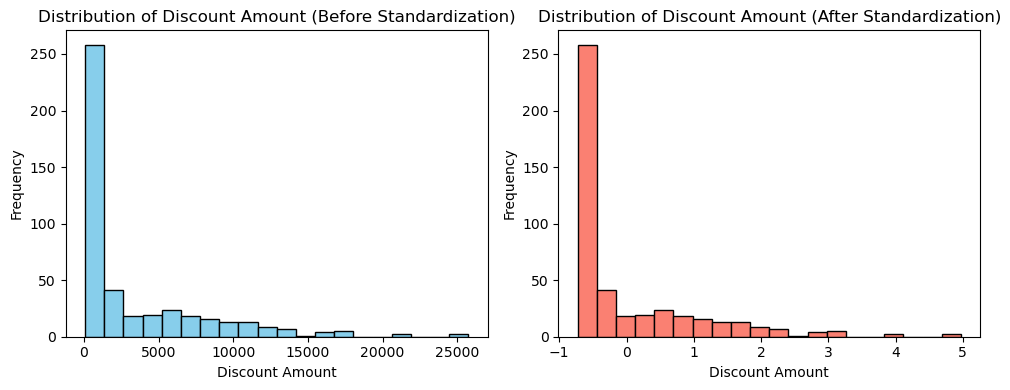

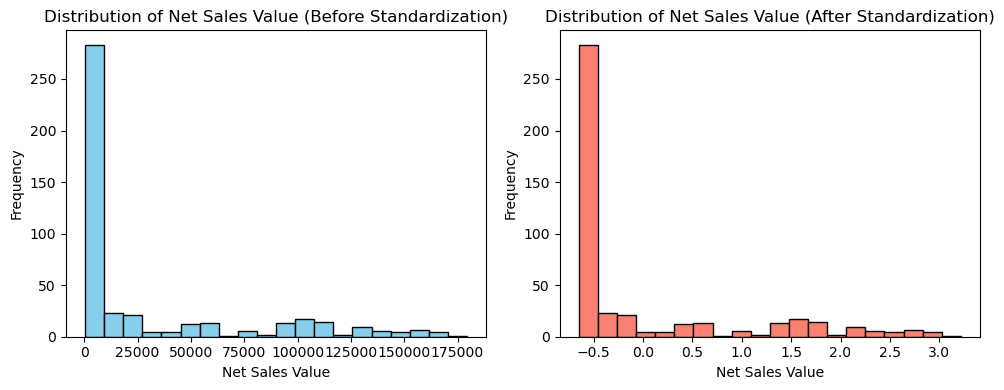

In [86]:
# Displaying comparison of data distributions before and after standardization
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(sales_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column} (Before Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(sales_data_standardized[column], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Distribution of {column} (After Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 4.Conversion of Categorical Data into Dummy Variables

#### Need for Converting Categorical Data into Dummy Variables (One-Hot Encoding)

In many machine learning algorithms, categorical variables cannot be directly used as inputs. One-hot encoding is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms. 
It creates binary (0 or 1) columns for each category in the categorical variable. This ensures that the categorical data is represented in a numerical format, allowing machine learning models to interpret and process it effectively.


#### Before One-Hot Encoding

In [88]:
# Displaying a portion of the dataset before one-hot encoding
print("Dataset Before One-Hot Encoding:")
print(sales_data.head())

Dataset Before One-Hot Encoding:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.92529

#### One-Hot Encoding

In [91]:
# Performing one-hot encoding on categorical columns
sales_data_encoded = pd.get_dummies(sales_data)


#### After One-Hot Encoding

In [ ]:
# Displaying a portion of the transformed dataset after one-hot encoding
print("\nDataset After One-Hot Encoding:")
print(sales_data_encoded.head())

# 5.Conclusion

#### Key Findings from Descriptive Analytics and Data Visualizations

1. Numerical Columns:
   - The mean Volume of sales is 5.07 units, with a median of 4 units, indicating a slightly right-skewed distribution.
   - Total Sales Value has a mean of 33812.84 and a median of 5700, suggesting a right-skewed distribution with some transactions having 
     considerably higher sales values.
   - Discount Amount and Net Sales Value exhibit similar patterns, with a wide range of values and a right-skewed distribution.

2. Data Visualization:
   - Histograms and boxplots revealed the distribution and presence of outliers in numerical variables.
   - Bar charts for categorical columns illustrated the frequency of transactions in each category, providing insights into the distribution of 
     sales across different cities and brands.



#### Reflection on the Importance of Data Preprocessing Steps

1. Standardization:
   - Standardizing numerical variables ensures that they are on the same scale, improving the performance of analytical models.
   - By scaling the data to have a mean of 0 and a standard deviation of 1, standardization facilitates accurate pattern recognition in the data.

2. One-Hot Encoding:
   - One-hot encoding transforms categorical variables into a numerical format suitable for machine learning algorithms.
   - This process enables models to interpret categorical data effectively and make accurate predictions based on the transformed dataset.


In conclusion, data preprocessing steps like standardization and one-hot encoding are essential for ensuring the quality and usability of the dataset in data analysis and machine learning tasks. These steps enable us to extract meaningful insights, build accurate models, and make informed decisions based on the data.
